# 데이터 시각화하기

### 데이터 불러오기

In [11]:
# kto_tota.xlsx 불러오기
import pandas as pd
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
# 한글처리 라이브러리
from matplotlib import font_manager, rc
# 시스템 os 확인을 위한 라이브러리
import platform

In [ ]:
# 운영체제별 폰트 정의하기
if platform.system() == "Windows" :
    path = "c:/Windows/Fonts/malgun.tif"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)
    
elif platform.system() == "Darwin":
    rc("font", family = "AppleGothic")
    # plt.rcParams['axes.unicode_minus'] = False
    
else :
    print("Check your OS System...")

In [9]:
file_path = "./files/kto_total.xlsx"
df = pd.read_excel(file_path)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [16]:
# 중국국적에 대한 데이터 필터링 해서 조회하기
condition = (df["국적"] == "중국")
condition

0       False
1       False
2       False
3       False
4       False
        ...  
6955    False
6956    False
6957    False
6958    False
6959    False
Name: 국적, Length: 6960, dtype: bool

In [17]:
# 중국 국적에 대한 필터링 결과 확인하기
df[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1


In [18]:
# 중국 국적에 대한 필터링 결과 확인하기
df_filter = df[condition]
df_filter.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1
6917,중국,451570,3625,388,44291,78238,578112,2019-08,아시아,78.1,36.1


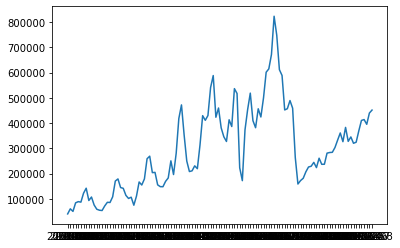

In [19]:
# 중국 관광객에 대한 년월별 추이 시각화 분석(시계열그래프 사용)
plt.plot(df_filter["기준년월"], df_filter["관광"])
plt.show()

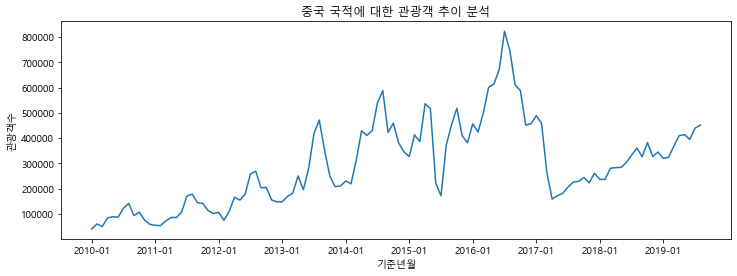

In [24]:
# 그래프 꾸미기

# 그래프 범례 한글 지원 코드
plt.rc('font', family = 'Malgun Gothic')
# 그래프 크기 조절
plt.figure(figsize = (12, 4))

# 그래프에 데이터 넣기
plt.plot(df_filter["기준년월"], df_filter["관광"])

# 그래프 제목
plt.title("중국 국적에 대한 관광객 추이 분석")
# x축 에 대한 라벨 추가
plt.xlabel("기준년월")
# y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..(리스트로 넣어야 함)
plt.xticks(["2010-01", "2011-01","2012-01", "2013-01","2014-01",
            "2015-01","2016-01", "2017-01","2018-01", "2019-01"])

plt.show()

In [26]:
# 관광객 전체비율이 높은 순으로 5개 국가 조회
df.sort_values("전체비율(%)", ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
4697,중국,823016,4103,354,7122,82924,917519,2016-07,아시아,89.7,58.6
4757,중국,747818,4352,270,35523,85808,873771,2016-08,아시아,85.6,57.0
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
3317,중국,588181,8340,173,23091,137898,757683,2014-08,아시아,77.6,54.3
4337,중국,456636,3723,140,4383,57099,521981,2016-01,아시아,87.5,52.8


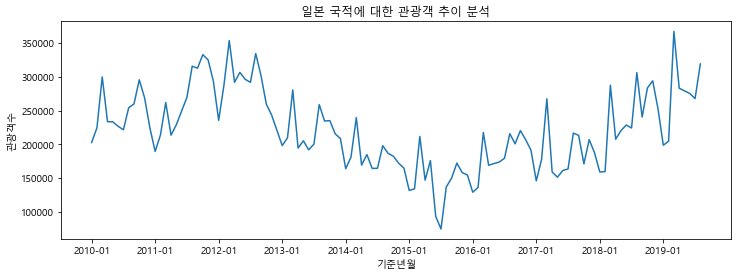

In [44]:
# 일본 관광객에 대한 년월별 추이 시각화 분석(시계열그래프 사용)

condition = (df["국적"] == "일본")
df_filter = df[condition]

# 그래프 크기 조절
plt.figure(figsize = (12, 4))

# 그래프에 데이터 넣기
plt.plot(df_filter["기준년월"], df_filter["관광"])

# 그래프 제목
plt.title("일본 국적에 대한 관광객 추이 분석")
# x축 에 대한 라벨 추가
plt.xlabel("기준년월")
# y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..(리스트로 넣어야 함)
plt.xticks(["2010-01", "2011-01","2012-01", "2013-01","2014-01",
            "2015-01","2016-01", "2017-01","2018-01", "2019-01"])

plt.show()

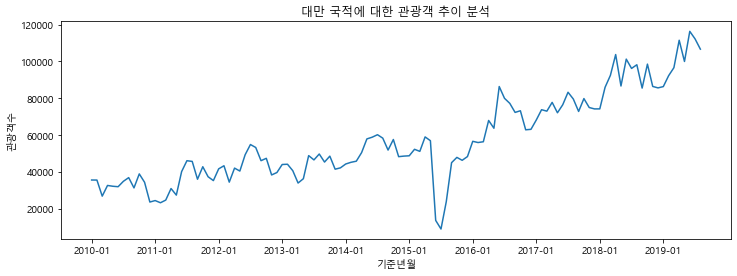

In [45]:
# 대만 관광객에 대한 년월별 추이 시각화 분석(시계열그래프 사용)

condition = (df["국적"] == "대만")
df_filter = df[condition]

# 그래프 크기 조절
plt.figure(figsize = (12, 4))

# 그래프에 데이터 넣기
plt.plot(df_filter["기준년월"], df_filter["관광"])

# 그래프 제목
plt.title("대만 국적에 대한 관광객 추이 분석")
# x축 에 대한 라벨 추가
plt.xlabel("기준년월")
# y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..(리스트로 넣어야 함)
plt.xticks(["2010-01", "2011-01","2012-01", "2013-01","2014-01",
            "2015-01","2016-01", "2017-01","2018-01", "2019-01"])

plt.show()

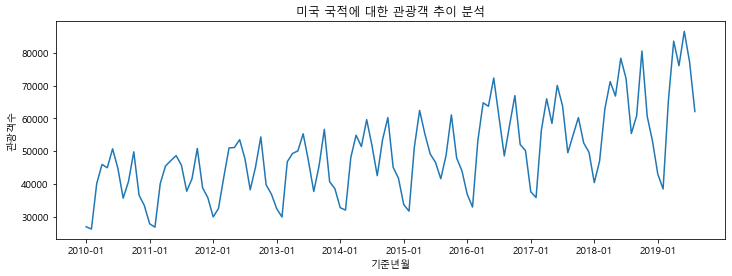

In [46]:
# 미국 관광객에 대한 년월별 추이 시각화 분석(시계열그래프 사용)

condition = (df["국적"] == "미국")
df_filter = df[condition]

# 그래프 크기 조절
plt.figure(figsize = (12, 4))

# 그래프에 데이터 넣기
plt.plot(df_filter["기준년월"], df_filter["관광"])

# 그래프 제목
plt.title("미국 국적에 대한 관광객 추이 분석")
# x축 에 대한 라벨 추가
plt.xlabel("기준년월")
# y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..(리스트로 넣어야 함)
plt.xticks(["2010-01", "2011-01","2012-01", "2013-01","2014-01",
            "2015-01","2016-01", "2017-01","2018-01", "2019-01"])

plt.show()

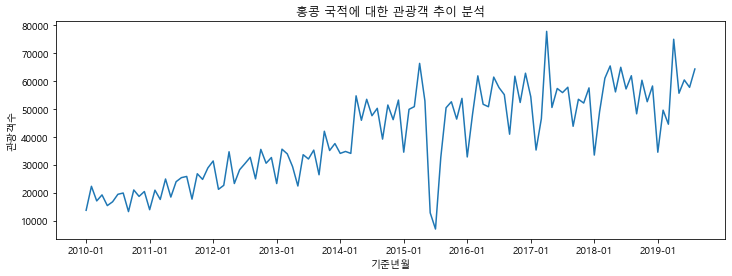

In [47]:
# 홍콩 관광객에 대한 년월별 추이 시각화 분석(시계열그래프 사용)

condition = (df["국적"] == "홍콩")
df_filter = df[condition]

# 그래프 크기 조절
plt.figure(figsize = (12, 4))

# 그래프에 데이터 넣기
plt.plot(df_filter["기준년월"], df_filter["관광"])

# 그래프 제목
plt.title("홍콩 국적에 대한 관광객 추이 분석")
# x축 에 대한 라벨 추가
plt.xlabel("기준년월")
# y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..(리스트로 넣어야 함)
plt.xticks(["2010-01", "2011-01","2012-01", "2013-01","2014-01",
            "2015-01","2016-01", "2017-01","2018-01", "2019-01"])

plt.show()

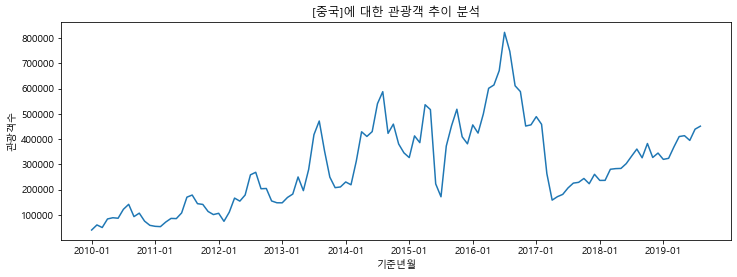

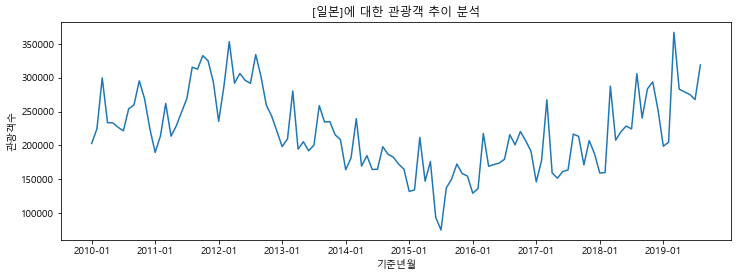

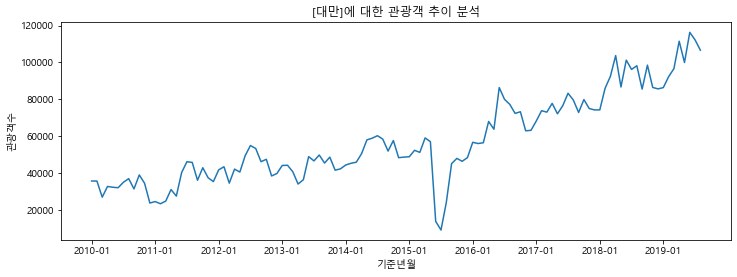

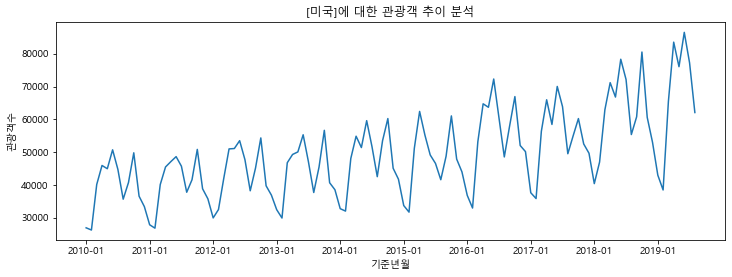

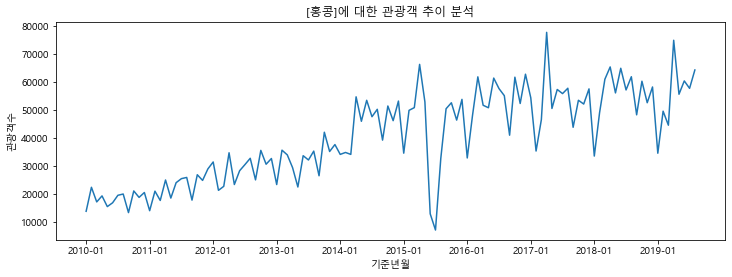

In [54]:
# 기준 만들기
cntry_list = ["중국", "일본", "대만", "미국", "홍콩"]

for cntry in cntry_list :
    
    condition = (df["국적"] == cntry)
    condition

    df_filter = df[condition]

    # 그래프 꾸미기
    # 그래프 크기 조절
    plt.rc('font', family = 'Malgun Gothic')

    plt.figure(figsize = (12, 4))

    # 그래프에 데이터 넣기..
    plt.plot(df_filter["기준년월"], df_filter["관광"])

    # 그래프 제목 넣기
    plt.title("[{}]에 대한 관광객 추이 분석".format(cntry))
    # x축에 대한 라벨 추가
    plt.xlabel("기준년월")
    # y축에 대한 라벨 추가
    plt.ylabel("관광객수")

    # x축에 대한 눈금을 조정..
    plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01", "2014-01",
                "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"])

    plt.show()

In [55]:
# 히트맵: 전체 시게열 데이터에 대한 이슈를 한눈에 보기
# 변수: 3개가 필요함

In [62]:
# 년도와 월만 조회 slice 함수
# 기준년월에서 년도만 추출하기
# 기준년월에서 월만 추출하기
df["년도"] = df["기준년월"].str.slice(0, 4)
df["월"] = df["기준년월"].str.slice(5, 7)

In [63]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [64]:
df_filter = df[(df["국적"] == "중국")]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1,2019,07


In [65]:
# 히트맵 그리는 순서 
# 1. 피봇으로 데이터 집계
# 2. 피봇 결과를 히트맵으로 적용

In [68]:
# 1. 피봇 데이터 만들기
df_pivot = df_filter.pivot_table(values = "관광",
                      index = "년도",
                      columns = "월")
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [67]:
# 2. 히트맵 그리기

# 히트맵은 시본 라이브러리를 함께 사용해야 함
import seaborn as sns

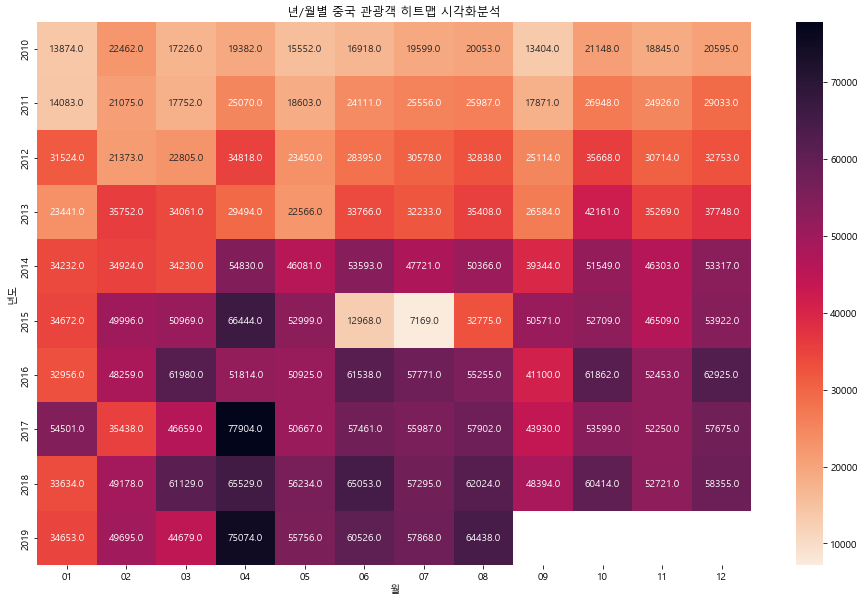

In [85]:
# 년/월별 중국 관광객 히트맵 시각화분석
# 그래프 크기 결정
plt.figure(figsize = (16, 10))

# 피봇 데이터 넣어서 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = "01", cmap = "rocket_r")

# 타이틀 넣기
plt.title("년/월별 중국 관광객 히트맵 시각화분석")

# 보여주기
plt.show()

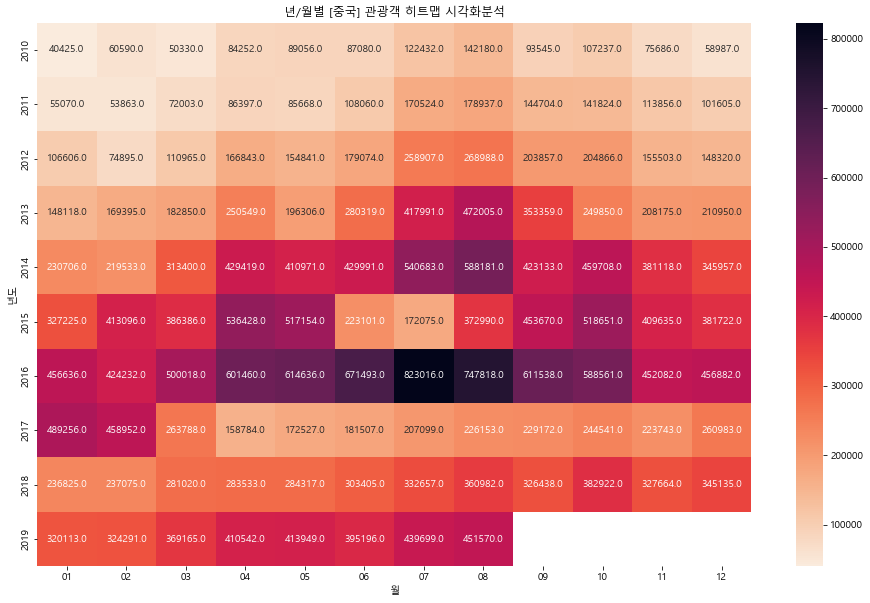

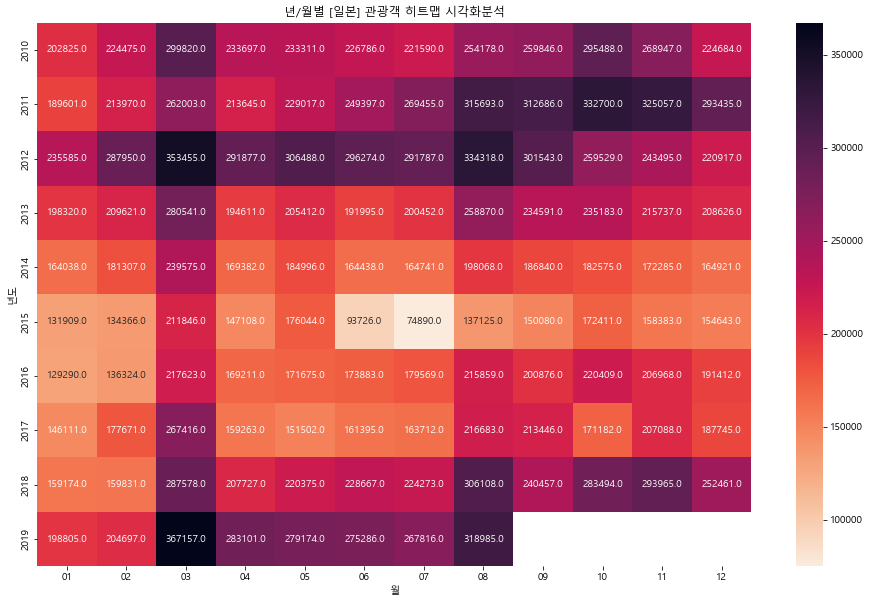

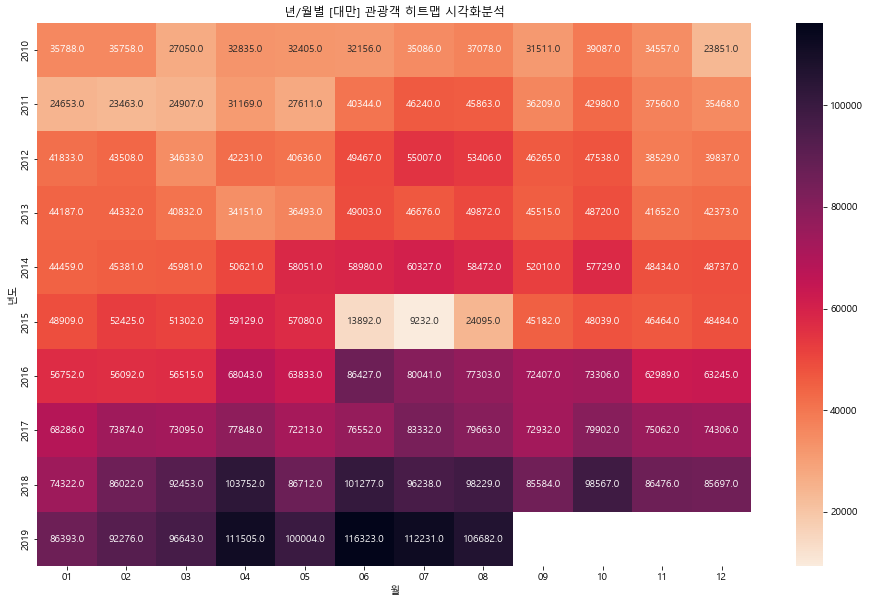

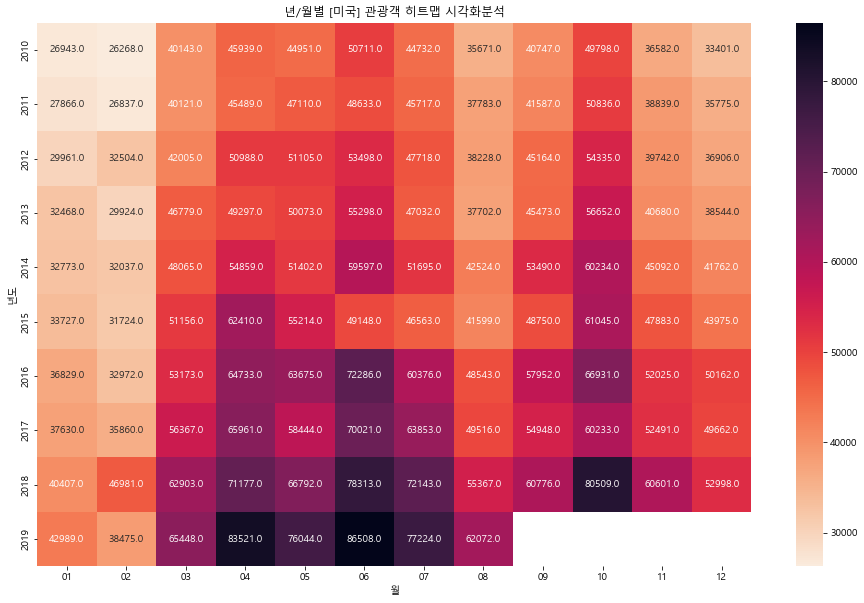

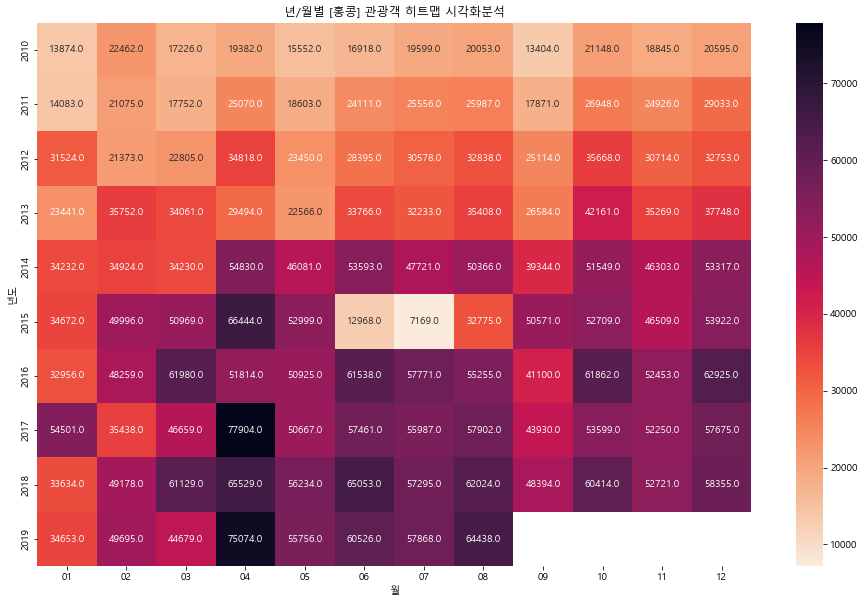

In [86]:
# 년/월별 중국, 일본, 대만, 미국, 홍콩 관광객 히트맵 시각화분석

for cntry in country_list :
    df_filter = df[(df["국적"] == cntry)]
    df_pivot = df_filter.pivot_table(values = "관광",
                      index = "년도",
                      columns = "월")
    df_pivot
    # 그래프 크기 결정
    plt.figure(figsize = (16, 10))

    # 피봇 데이터 넣어서 그래프 그리기
    sns.heatmap(df_pivot, annot = True, fmt = "01", cmap = "rocket_r")

    # 타이틀 넣기
    plt.title("년/월별 [{}] 관광객 히트맵 시각화분석".format(cntry))

    # 보여주기
    plt.show()

